In [1]:
# useful additional packages
import matplotlib.pyplot as plt
import networkx as nx
import time
from qiskit_optimization.applications import Maxcut
# General imports
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Pre-defined ansatz circuit, operator class and visualization tools
from qiskit.circuit.library import QAOAAnsatz

from qiskit import transpile
from qiskit_aer import AerSimulator
# from qiskit.visualization import plot_distribution
#from qiskit.quantum_info import SparsePauliOp
# Qiskit Runtime
# from qiskit_ibm_runtime import QiskitRuntimeService
# from qiskit_ibm_runtime import Estimator, Sampler, Session, Options

# SciPy minimizer routine
from scipy.optimize import minimize
from qiskit.visualization import plot_histogram
from qiskit.primitives import BackendEstimator, BackendSampler



In [2]:

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

Problem name: Max-cut

Maximize
  -2*x_0*x_1 - 2*x_0*x_2 - 2*x_1*x_2 - 2*x_2*x_3 - 2*x_3*x_4 - 2*x_3*x_5
  - 2*x_4*x_5 + 2*x_0 + 2*x_1 + 3*x_2 + 3*x_3 + 2*x_4 + 2*x_5

Subject to
  No constraints

  Binary variables (6)
    x_0 x_1 x_2 x_3 x_4 x_5



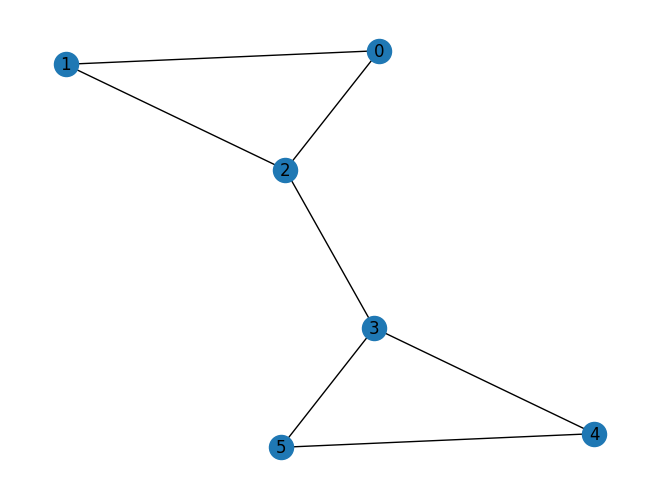

In [3]:
num_nodes = 6



# G = nx.random_regular_graph(d=3, n=num_nodes, seed=seed)
# nx.draw(G, with_labels=True, pos=nx.spring_layout(G, seed=seed))


G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,0),(3,2),(4,3),(5,3),(4,5)])
nx.draw_spring(G, with_labels=True)
maxcut = Maxcut(G)
problem = maxcut.to_quadratic_program()
print(problem.prettyprint())

In [4]:
# Initialize the weight matrix
w = np.zeros((num_nodes, num_nodes))

# Iterate over the edges of the graph and assign weights to the weight matrix
for edge in G.edges():
    node1, node2 = edge
    w[node1][node2] = 1
    w[node2][node1] = 1  # Assuming undirected graph

# Print the weight matrix
#print("Weight Matrix:")
#print(w)

pos = nx.spring_layout(G)


Best solution = [1, 0, 0, 1, 0, 0] cost = 5.0

Best solution = [0, 1, 0, 1, 0, 0] cost = 5.0

Best solution = [1, 1, 0, 1, 0, 0] cost = 5.0

Best solution = [0, 0, 1, 0, 1, 0] cost = 5.0

Best solution = [1, 0, 1, 0, 1, 0] cost = 5.0

Best solution = [0, 1, 1, 0, 1, 0] cost = 5.0

Best solution = [1, 0, 0, 1, 1, 0] cost = 5.0

Best solution = [0, 1, 0, 1, 1, 0] cost = 5.0

Best solution = [1, 1, 0, 1, 1, 0] cost = 5.0

Best solution = [0, 0, 1, 0, 0, 1] cost = 5.0

Best solution = [1, 0, 1, 0, 0, 1] cost = 5.0

Best solution = [0, 1, 1, 0, 0, 1] cost = 5.0

Best solution = [1, 0, 0, 1, 0, 1] cost = 5.0

Best solution = [0, 1, 0, 1, 0, 1] cost = 5.0

Best solution = [1, 1, 0, 1, 0, 1] cost = 5.0

Best solution = [0, 0, 1, 0, 1, 1] cost = 5.0

Best solution = [1, 0, 1, 0, 1, 1] cost = 5.0

Best solution = [0, 1, 1, 0, 1, 1] cost = 5.0
elapsed time = 0.17423510551452637 sec


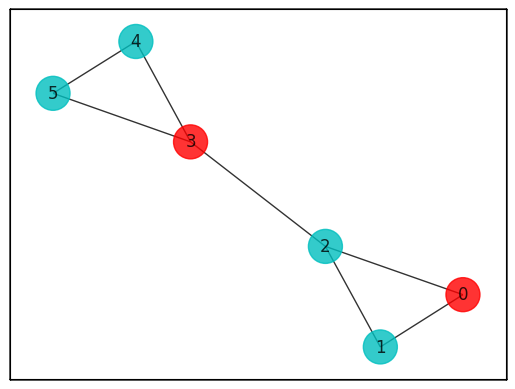

In [5]:
import itertools

tic = time.time()
best_cost_brute = 0
best_solutions_brute = []

for b in range(2 ** num_nodes):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(num_nodes)))]
    cost = 0
    for i in range(num_nodes):
        for j in range(num_nodes):
            cost += w[i, j] * x[i] * (1 - x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        best_solutions_brute = [x]
    elif best_cost_brute == cost:
        best_solutions_brute.append(x)

    #print("case = " + str(x) + " cost = " + str(cost))

for solution in best_solutions_brute:
    colors = ["r" if solution[i] == 0 else "c" for i in range(num_nodes)]
    draw_graph(G, colors, pos)
    print("\nBest solution = " + str(solution) + " cost = " + str(best_cost_brute))

toc = time.time()
print("elapsed time = " + str(toc - tic) + " sec")



Best solution = [1, 0, 0, 1, 0, 0] cost = 5.0

Best solution = [0, 1, 0, 1, 0, 0] cost = 5.0

Best solution = [1, 1, 0, 1, 0, 0] cost = 5.0

Best solution = [0, 0, 1, 0, 1, 0] cost = 5.0

Best solution = [1, 0, 1, 0, 1, 0] cost = 5.0

Best solution = [0, 1, 1, 0, 1, 0] cost = 5.0

Best solution = [1, 0, 0, 1, 1, 0] cost = 5.0

Best solution = [0, 1, 0, 1, 1, 0] cost = 5.0

Best solution = [1, 1, 0, 1, 1, 0] cost = 5.0

Best solution = [0, 0, 1, 0, 0, 1] cost = 5.0

Best solution = [1, 0, 1, 0, 0, 1] cost = 5.0

Best solution = [0, 1, 1, 0, 0, 1] cost = 5.0

Best solution = [1, 0, 0, 1, 0, 1] cost = 5.0

Best solution = [0, 1, 0, 1, 0, 1] cost = 5.0

Best solution = [1, 1, 0, 1, 0, 1] cost = 5.0

Best solution = [0, 0, 1, 0, 1, 1] cost = 5.0

Best solution = [1, 0, 1, 0, 1, 1] cost = 5.0

Best solution = [0, 1, 1, 0, 1, 1] cost = 5.0
elapsed time = 0.1992952823638916 sec
All possible best solutions: [[1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0], [1, 1, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0], [1, 0,

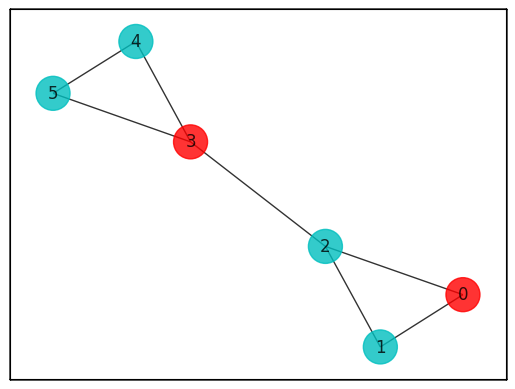

In [6]:
import itertools

tic = time.time()
best_cost_brute = 0
best_solutions_brute = []

for b in range(2 ** num_nodes):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(num_nodes)))]
    cost = 0
    for i in range(num_nodes):
        for j in range(num_nodes):
            cost += w[i, j] * x[i] * (1 - x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        best_solutions_brute = [x]
    elif best_cost_brute == cost:
        best_solutions_brute.append(x)

    #print("case = " + str(x) + " cost = " + str(cost))

for solution in best_solutions_brute:
    colors = ["r" if solution[i] == 0 else "c" for i in range(num_nodes)]
    draw_graph(G, colors, pos)
    print("\nBest solution = " + str(solution) + " cost = " + str(best_cost_brute))

toc = time.time()
print("elapsed time = " + str(toc - tic) + " sec")

# Append all possible best solutions to a list
all_best_solutions = []
for b in range(2 ** num_nodes):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(num_nodes)))]
    cost = 0
    for i in range(num_nodes):
        for j in range(num_nodes):
            cost += w[i, j] * x[i] * (1 - x[j])
    if cost == best_cost_brute:
        all_best_solutions.append(x)

print("All possible best solutions:", all_best_solutions)


In [7]:
max_cut = Maxcut(G)
qp = max_cut.to_quadratic_program()
print(qp.prettyprint())

Problem name: Max-cut

Maximize
  -2*x_0*x_1 - 2*x_0*x_2 - 2*x_1*x_2 - 2*x_2*x_3 - 2*x_3*x_4 - 2*x_3*x_5
  - 2*x_4*x_5 + 2*x_0 + 2*x_1 + 3*x_2 + 3*x_3 + 2*x_4 + 2*x_5

Subject to
  No constraints

  Binary variables (6)
    x_0 x_1 x_2 x_3 x_4 x_5



In [8]:
qubitOp, offset = qp.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: -3.5
Ising Hamiltonian:
SparsePauliOp(['IIIIZZ', 'IIIZIZ', 'IIIZZI', 'IIZZII', 'IZZIII', 'ZIZIII', 'ZZIIII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])


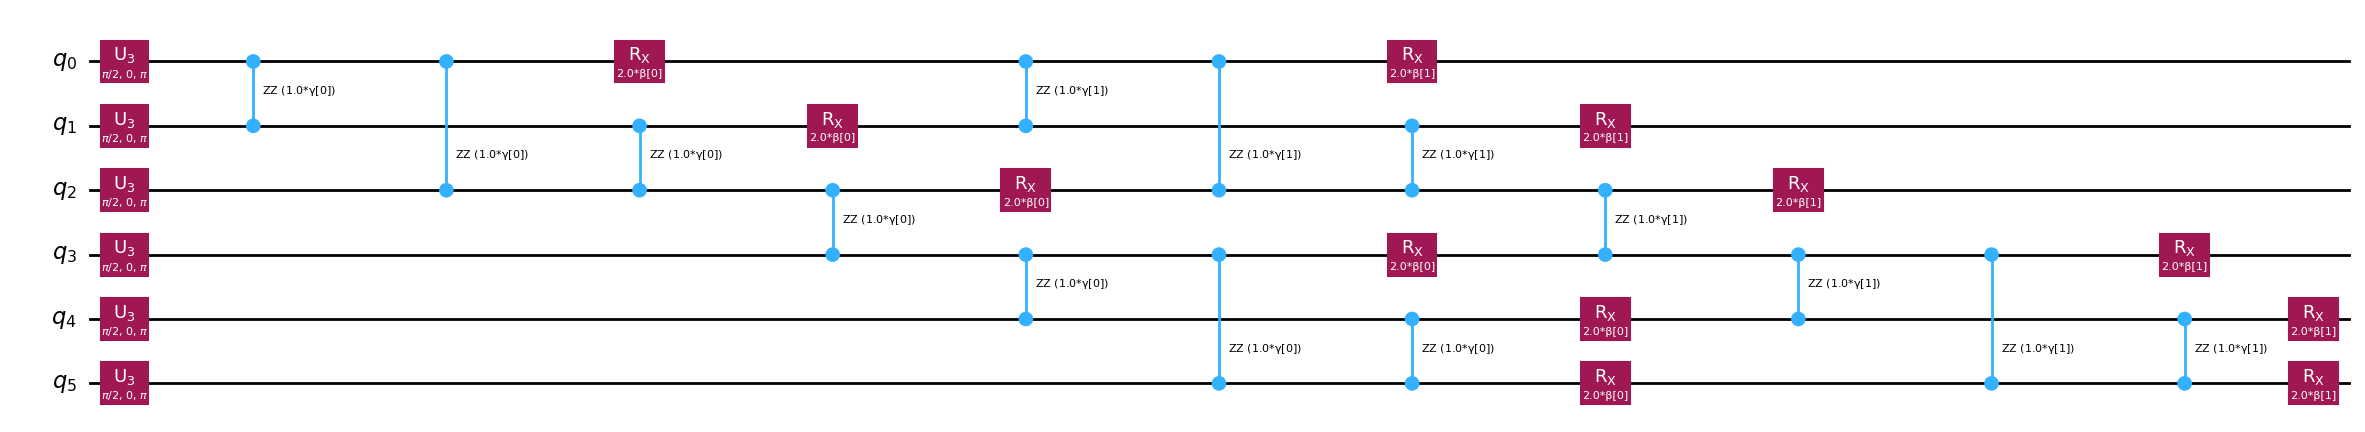

In [9]:
# QAOA ansatz circuit
ansatz = QAOAAnsatz(qubitOp, reps=2)

# the reps in decompose means, the number of times the circuit should be decomposed
# for example reps = 2 means circuit.decompise().decompose()
ansatz.decompose(reps=3).draw(output="mpl", style="iqp",fold=-1)

In [10]:
print(f"Number of Qubits: {ansatz.num_qubits}")
print(f"Number of Parameters: {ansatz.num_parameters}")


Number of Qubits: 6
Number of Parameters: 4


In [11]:
x0 = 2 * np.pi * np.random.rand(ansatz.num_parameters)
print(x0)

[2.58978996 3.98902345 1.17883648 5.80269148]


In [15]:
from qiskit.quantum_info import PauliList
observable = PauliList(['ZZZZZZ'])

In [16]:
from gate_cut import *

In [17]:
expectation = get_expectation(ansatz,"AAABBB",observable)
res = minimize(expectation,x0,method= 'COBYLA')
print(res)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.38815777003766333
       x: [ 2.416e+00  4.365e+00  1.040e+00  5.448e+00]
    nfev: 54
   maxcv: 0.0


In [21]:
print(res.x)

[2.41581332 4.36546941 1.04028932 5.44787562]


In [22]:
ansatz = QAOAAnsatz(qubitOp, reps=2)
circuit = ansatz.assign_parameters(res.x)
sampler = BackendSampler(backend=AerSimulator(method="statevector"))
circuit.measure_all()
samp_dist = sampler.run(circuit).result().quasi_dists[0]
my_dict = dict(sorted(samp_dist.binary_probabilities().items(),key=lambda item: item[1], reverse=True))
print(my_dict)



{'000111': 0.1259765625, '111000': 0.123046875, '110100': 0.099609375, '001011': 0.080078125, '111111': 0.05078125, '000000': 0.05078125, '001100': 0.0478515625, '000100': 0.044921875, '110011': 0.041015625, '111011': 0.0380859375, '110111': 0.033203125, '001000': 0.0244140625, '111101': 0.0146484375, '011000': 0.013671875, '010000': 0.013671875, '111001': 0.013671875, '011111': 0.01171875, '101000': 0.01171875, '000010': 0.01171875, '010111': 0.01171875, '111110': 0.0107421875, '100000': 0.0107421875, '000101': 0.0107421875, '111010': 0.0107421875, '100111': 0.0107421875, '000001': 0.0107421875, '101111': 0.009765625, '000110': 0.0087890625, '000011': 0.005859375, '011110': 0.005859375, '101100': 0.0048828125, '101110': 0.00390625, '111100': 0.00390625, '001101': 0.00390625, '101101': 0.0029296875, '110000': 0.0029296875, '011101': 0.0029296875, '001111': 0.0029296875, '010010': 0.0029296875, '011100': 0.0029296875, '100010': 0.001953125, '010001': 0.001953125, '100001': 0.0009765625,

In [24]:
print(all_best_solutions)

[[1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0], [1, 1, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0], [1, 0, 1, 0, 1, 0], [0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 1, 0], [0, 1, 0, 1, 1, 0], [1, 1, 0, 1, 1, 0], [0, 0, 1, 0, 0, 1], [1, 0, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1], [1, 0, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 1], [1, 0, 1, 0, 1, 1], [0, 1, 1, 0, 1, 1]]


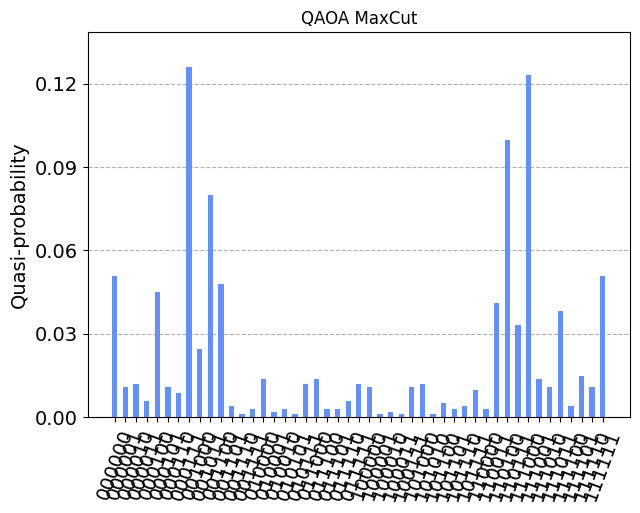

In [23]:
plot_histogram(my_dict, title="QAOA MaxCut",bar_labels=False)